## Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Breast_cancer_dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
features = df.columns[1:]

In [6]:
import sklearn
print(sklearn.__version__)

1.3.1


In [7]:
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0})

In [9]:
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    train_size = 0.8,
                                                    random_state = 12345
                                                   )

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt


def get_metrics(y_true, y_pred, y_prob, train=True, show_roc = True):
    sk_acc = accuracy_score(y_pred=y_pred, y_true = y_true)
    sk_prec = precision_score(y_pred=y_pred, y_true = y_true)
    sk_rec = recall_score(y_pred=y_pred, y_true = y_true)
    sk_f1 = f1_score(y_pred=y_pred, y_true = y_true)

    fpr, tpr, thresholds = roc_curve(y_true, y_prob[:, 1])

    # Compute the Area Under the Curve (AUC) for the ROC curve
    roc_auc = auc(fpr, tpr)

    # Compute Youden's J statistic for each threshold
    youden_j = tpr - fpr
    optimal_threshold_index = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_threshold_index]

    print("------------------------------------------------------------------")
    if train:
        print("Training Set Metrics")
    else:
        print("Test Set Metrics")
    conf_matrix= confusion_matrix(y_true= y_true, y_pred = y_pred)

    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["benign", "malignant"])
    plt.figure(figsize= (8,6))
    cm_display.plot()
    plt.show()

    print(f"Accuracy {np.round(sk_acc*100,2)}%, Precision {np.round(sk_prec*100,2)}%, Recall {np.round(sk_rec*100,2)}%, F1 Score {np.round(sk_f1*100,2)}%")

    if train and show_roc:
        print(f"Area Under Curve {roc_auc}, optimal threshold {optimal_threshold}")

        plt.figure(figsize=(4, 3))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
        plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve Training')
        plt.legend(loc='lower right')
        plt.show()

# **Naive Bayes**

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()

In [16]:
nb_model.fit(X_train_sc, y_train)

GaussianNB()

In [17]:
y_tr_pred = nb_model.predict(X_train_sc) # Class Prediction on the Training Set
y_ts_pred = nb_model.predict(X_test_sc) # Class prediction on the test set

In [18]:
y_tr_prob = nb_model.predict_proba(X_train_sc) # Class Probability Prediction on the Training set
y_ts_prob = nb_model.predict_proba(X_test_sc) # Class Probability prediction on the test set

------------------------------------------------------------------
Training Set Metrics


<Figure size 576x432 with 0 Axes>

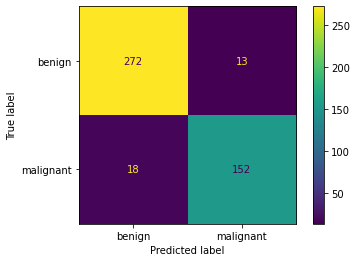

Accuracy 93.19%, Precision 92.12%, Recall 89.41%, F1 Score 90.75%
Area Under Curve 0.988173374613003, optimal threshold 0.0009198515374239828


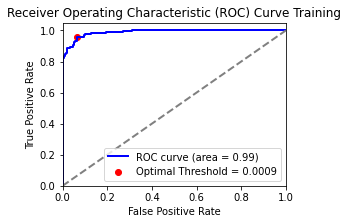

In [19]:
get_metrics(y_pred=y_tr_pred, y_true=y_train, y_prob=y_tr_prob)

------------------------------------------------------------------
Test Set Metrics


<Figure size 576x432 with 0 Axes>

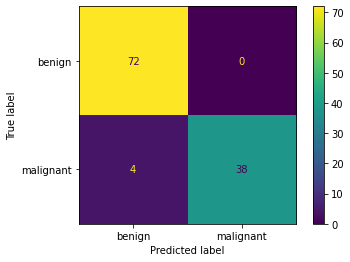

Accuracy 96.49%, Precision 100.0%, Recall 90.48%, F1 Score 95.0%


In [20]:
get_metrics(y_pred=y_ts_pred, y_true=y_test, y_prob=y_ts_prob, train=False)

# **K Nearest Neighbor**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [23]:
knn_model.fit(X_train_sc,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_tr_pred = knn_model.predict(X_train_sc)
y_tr_prob = knn_model.predict_proba(X_train_sc)
y_ts_pred = knn_model.predict(X_test_sc)
y_ts_prob = knn_model.predict_proba(X_test_sc)

In [25]:
accuracy_score(y_true = y_train, y_pred = y_tr_pred)

0.9824175824175824

In [26]:
accuracy_score(y_true = y_test, y_pred = y_ts_pred)

0.9912280701754386

------------------------------------------------------------------
Training Set Metrics


<Figure size 576x432 with 0 Axes>

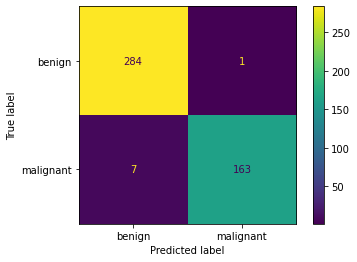

Accuracy 98.24%, Precision 99.39%, Recall 95.88%, F1 Score 97.6%
Area Under Curve 0.998482972136223, optimal threshold 0.6666666666666666


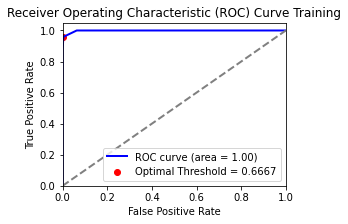

In [27]:
get_metrics(y_true = y_train, y_pred = y_tr_pred, y_prob=y_tr_prob)

------------------------------------------------------------------
Test Set Metrics


<Figure size 576x432 with 0 Axes>

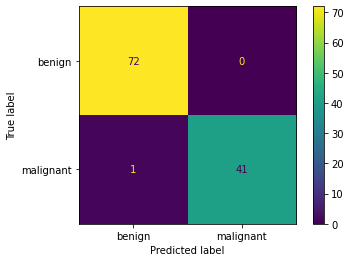

Accuracy 99.12%, Precision 100.0%, Recall 97.62%, F1 Score 98.8%


In [28]:
get_metrics(y_true = y_test, y_pred = y_ts_pred, y_prob=y_ts_prob, train=False)

In [29]:
grid_knn = {}
grid_knn['n_neighbors'] = np.arange(1,21,2)

In [30]:
grid_knn

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [31]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

In [32]:
cv = RepeatedKFold(n_splits =10, random_state =12345, n_repeats=3)

In [33]:
gs_knn_model = KNeighborsClassifier()

In [34]:
gs_knn_search = GridSearchCV(gs_knn_model, grid_knn, scoring = 'accuracy',cv = cv, n_jobs= -1)

In [35]:
gs_knn_results = gs_knn_search.fit(X_train_sc, y_train)

In [36]:
gs_knn_results.best_params_

{'n_neighbors': 3}

# **Decision Trees**

In [37]:
from sklearn.tree import DecisionTreeClassifier
#dt_model = DecisionTreeClassifier(random_state=12345)
dt_model = DecisionTreeClassifier(random_state=12345, max_depth=5, ccp_alpha=0.01)
dt_model.fit(X_train_sc, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, random_state=12345)

In [38]:
import sklearn
print(sklearn.__version__)

1.3.1


In [39]:
y_tr_pred = dt_model.predict(X_train_sc)
y_ts_pred = dt_model.predict(X_test_sc)

y_tr_prob = dt_model.predict_proba(X_train_sc)
y_ts_prob = dt_model.predict_proba(X_test_sc)

------------------------------------------------------------------
Training Set Metrics


<Figure size 576x432 with 0 Axes>

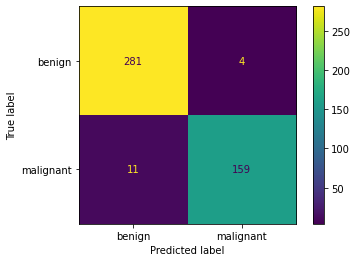

Accuracy 96.7%, Precision 97.55%, Recall 93.53%, F1 Score 95.5%
Area Under Curve 0.9657481940144478, optimal threshold 0.8421052631578947


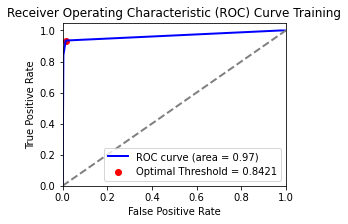

In [40]:
get_metrics(y_true=y_train, y_pred = y_tr_pred, y_prob = y_tr_prob)

------------------------------------------------------------------
Test Set Metrics


<Figure size 576x432 with 0 Axes>

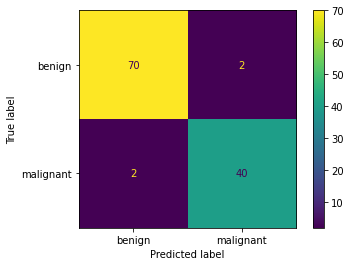

Accuracy 96.49%, Precision 95.24%, Recall 95.24%, F1 Score 95.24%


In [41]:
get_metrics(y_true=y_test, y_pred = y_ts_pred, y_prob = y_ts_prob, train=False)

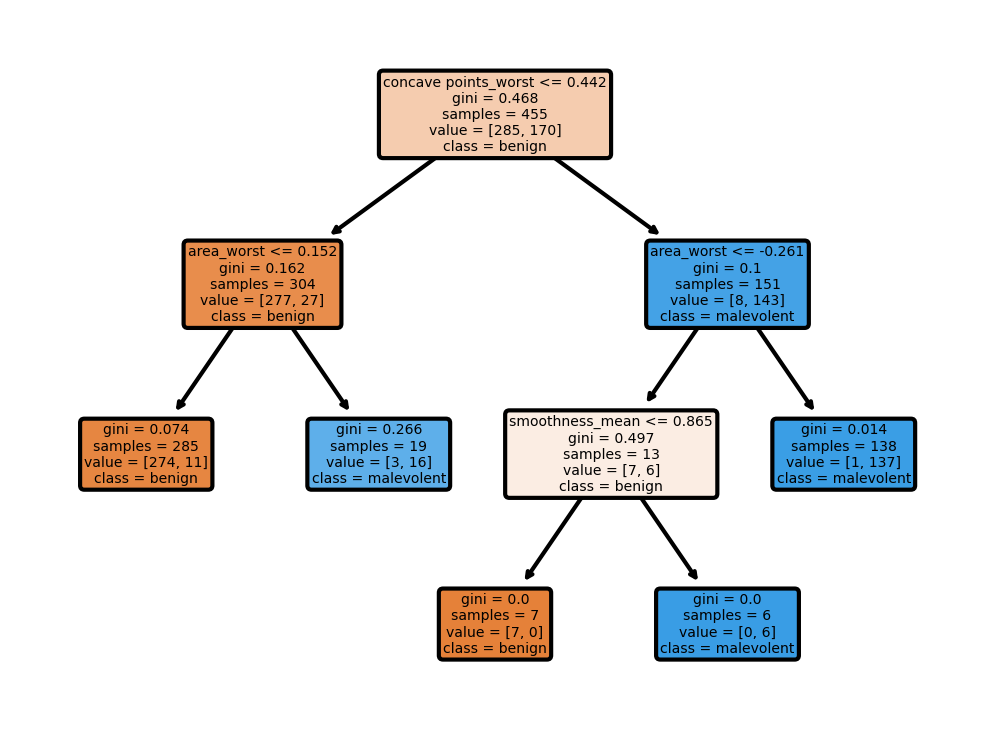

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=300)
plot_tree(dt_model,filled=True,rounded=True, ax=axes, feature_names=features, class_names=['benign','malevolent'])
#plt.show()
plt.savefig('treecancer.png', format='png')
plt.show()

In [43]:
grid_dtree = {}
grid_dtree['max_depth'] = np.arange(3,10, 1)
grid_dtree['ccp_alpha'] = np.arange(0.01,0.05,0.01)

In [44]:
# Now we do grid search
gs_tree_model = DecisionTreeClassifier(random_state=12345)

In [45]:
gs_tree_search = GridSearchCV(gs_tree_model, grid_dtree, scoring = 'accuracy',cv = cv, n_jobs= -1)

In [46]:
gs_tree_result = gs_tree_search.fit(X_train_sc, y_train)

In [47]:
gs_tree_result.best_params_

{'ccp_alpha': 0.01, 'max_depth': 5}

# <strong> RandomForest Classifier </strong>

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_model = RandomForestClassifier(random_state = 12345, n_estimators = 101)

In [50]:
rf_model.fit(X_train_sc, y_train)

RandomForestClassifier(n_estimators=101, random_state=12345)

In [51]:
y_tr_pred = rf_model.predict(X_train_sc)
y_ts_pred = rf_model.predict(X_test_sc)

y_tr_prob = rf_model.predict_proba(X_train_sc)
y_ts_prob = rf_model.predict_proba(X_test_sc)

------------------------------------------------------------------
Training Set Metrics


<Figure size 576x432 with 0 Axes>

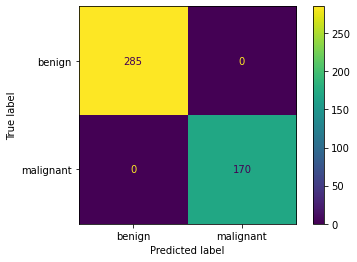

Accuracy 100.0%, Precision 100.0%, Recall 100.0%, F1 Score 100.0%
Area Under Curve 1.0, optimal threshold 0.6237623762376238


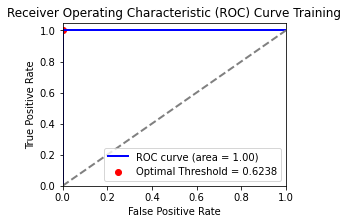

In [52]:
get_metrics(y_true=y_train, y_pred = y_tr_pred, y_prob = y_tr_prob)

------------------------------------------------------------------
Test Set Metrics


<Figure size 576x432 with 0 Axes>

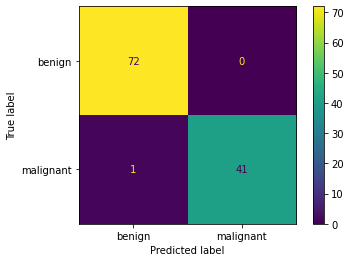

Accuracy 99.12%, Precision 100.0%, Recall 97.62%, F1 Score 98.8%


In [53]:
get_metrics(y_true=y_test, y_pred = y_ts_pred, y_prob = y_ts_prob, train = False)

# **Support Vector Machines**

In [54]:
from sklearn.svm import SVC

In [55]:
svm_model = SVC(probability=True,C=0.8, random_state = 12345)

In [56]:
svm_model.fit(X_train_sc, y_train)

SVC(C=0.8, probability=True, random_state=12345)

In [57]:
y_tr_pred = svm_model.predict(X_train_sc)
y_tr_prob = svm_model.predict_proba(X_train_sc)

y_ts_pred = svm_model.predict(X_test_sc)
y_ts_prob = svm_model.predict_proba(X_test_sc)

------------------------------------------------------------------
Training Set Metrics


<Figure size 576x432 with 0 Axes>

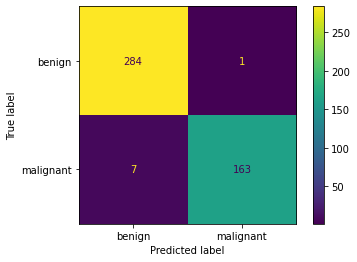

Accuracy 98.24%, Precision 99.39%, Recall 95.88%, F1 Score 97.6%
Area Under Curve 0.9972342621259029, optimal threshold 0.4933076041763212


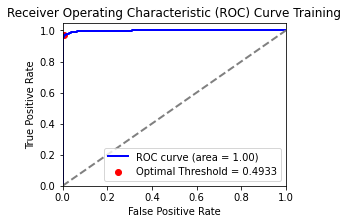

In [58]:
get_metrics(y_true = y_train, y_pred = y_tr_pred, y_prob = y_tr_prob)

------------------------------------------------------------------
Test Set Metrics


<Figure size 576x432 with 0 Axes>

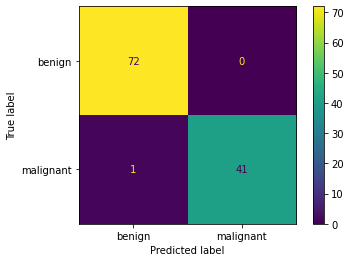

Accuracy 99.12%, Precision 100.0%, Recall 97.62%, F1 Score 98.8%


In [59]:
get_metrics(y_true = y_test, y_pred = y_ts_pred, y_prob = y_ts_prob, train=False)

In [74]:
grid_svm = {}
grid_svm['C'] = np.arange(0.1,1.0, 0.1)

In [75]:
gs_svm_model = SVC(random_state = 12345, probability=True)

In [76]:
gs_svm_search = GridSearchCV(gs_svm_model, grid_svm, scoring = 'accuracy',cv = cv, n_jobs= -1)

In [83]:
gs_svm_result = gs_svm_search.fit(X_train_sc, y_train)

In [84]:
gs_svm_result.best_params_

{'C': 0.8}

In [80]:
y_tr_pred = gs_svm_search.predict(X_train_sc)
y_tr_prob = gs_svm_search.predict_proba(X_train_sc)

y_ts_pred = gs_svm_search.predict(X_test_sc)
y_ts_prob = gs_svm_search.predict_proba(X_test_sc)

------------------------------------------------------------------
Training Set Metrics


<Figure size 576x432 with 0 Axes>

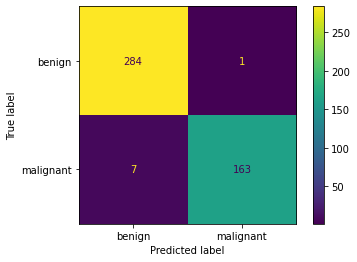

Accuracy 98.24%, Precision 99.39%, Recall 95.88%, F1 Score 97.6%
Area Under Curve 0.9972342621259029, optimal threshold 0.4933076041763212


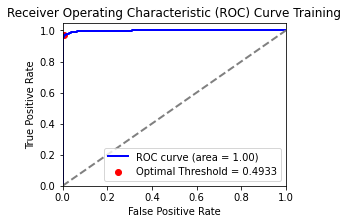

In [81]:
get_metrics(y_true = y_train, y_pred = y_tr_pred, y_prob = y_tr_prob)

------------------------------------------------------------------
Training Set Metrics


<Figure size 576x432 with 0 Axes>

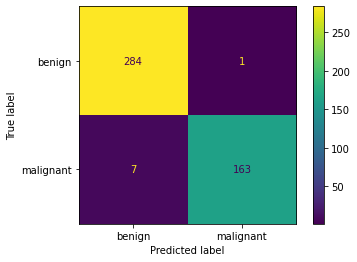

Accuracy 98.24%, Precision 99.39%, Recall 95.88%, F1 Score 97.6%
Area Under Curve 0.9972342621259029, optimal threshold 0.4933076041763212


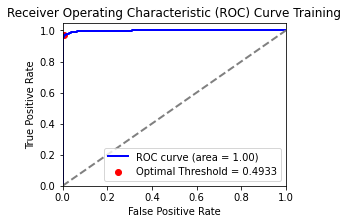

In [82]:
get_metrics(y_true = y_train, y_pred = y_tr_pred, y_prob = y_tr_prob)